In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

# Đọc dữ liệu từ tệp CSV
file_path = 'D:/data/file__data_probit.csv'  # Đặt đường dẫn đến file của bạn
data = pd.read_csv(file_path)

# Chuẩn hóa biến SALES bằng cách chia cho 10^12 để giảm độ lớn của dữ liệu
data['SALES'] = data['SALES'] / 1e12

# Xác định các biến độc lập cho giai đoạn 1, bao gồm các biến kiểm soát
X_stage1 = data[['LEV', 'M/B', 'SALES', 'SHRINC', 'LOSS', 'Year_2016', 'Year_2018', 'Year_2020', 
                 'Industry_Daukhi', 'Industry_Duocphamvayte', 'Industry_Taichinh']]

# Thêm hằng số vào mô hình
X_stage1 = sm.add_constant(X_stage1)

# Biến phụ thuộc BIG4
y_stage1 = data['BIG4']

# Loại bỏ các hàng có giá trị NaN hoặc vô hạn trong X_stage1 và y_stage1
X_stage1 = X_stage1.replace([np.inf, -np.inf], np.nan).dropna()
y_stage1 = y_stage1[X_stage1.index]  # Đồng bộ y với các chỉ số còn lại sau khi xóa NaN trong X

# Xây dựng và thực hiện hồi quy Probit để tính toán xác suất Pred(BIG4)
probit_model_stage1 = sm.Probit(y_stage1, X_stage1)
probit_result_stage1 = probit_model_stage1.fit()

# In kết quả
print(probit_result_stage1.summary())

# Tính xác suất dự đoán từ mô hình Probit
data.loc[X_stage1.index, 'Pred_BIG4'] = probit_result_stage1.predict(X_stage1)

# Lưu kết quả vào file CSV với cột Pred_BIG4
output_path = 'D:/data/pred_big4_results.csv'  # Đặt đường dẫn và tên file xuất ra
data[['ma', 'year', 'Pred_BIG4']].to_csv(output_path, index=False)

print(f"File đã được lưu thành công tại: {output_path}")


Optimization terminated successfully.
         Current function value: 0.534657
         Iterations 7
                          Probit Regression Results                           
Dep. Variable:                   BIG4   No. Observations:                 4787
Model:                         Probit   Df Residuals:                     4775
Method:                           MLE   Df Model:                           11
Date:                Sun, 17 Nov 2024   Pseudo R-squ.:                  0.1047
Time:                        22:43:53   Log-Likelihood:                -2559.4
converged:                       True   LL-Null:                       -2858.7
Covariance Type:            nonrobust   LLR p-value:                2.905e-121
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.8974      0.055    -16.418      0.000      -1.004      

In [11]:
import pandas as pd
from scipy.stats import norm

# Đọc dữ liệu từ file CSV có sẵn chứa Pred(BIG4)
file_path = 'D:/data/pred_big4_results.csv'  # Đặt đường dẫn đến file của bạn
pred_data = pd.read_csv(file_path)

# Tính Lambda từ Pred(BIG4) (tỷ lệ Mills nghịch đảo)
# Lambda = norm.pdf(Pred_BIG4) / norm.cdf(Pred_BIG4)
pred_data['Lambda'] = norm.pdf(pred_data['Pred_BIG4']) / norm.cdf(pred_data['Pred_BIG4'])

# Lưu kết quả vào file CSV mới với cả Pred(BIG4) và Lambda
output_path = 'D:/data/lambda_results.csv'  # Đặt đường dẫn và tên file xuất ra
pred_data.to_csv(output_path, index=False)

print(f"File đã được lưu thành công tại: {output_path}")


File đã được lưu thành công tại: D:/data/lambda_results.csv


                            OLS Regression Results                            
Dep. Variable:                  SYNCH   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     160.2
Date:                Mon, 18 Nov 2024   Prob (F-statistic):          2.66e-243
Time:                        10:10:46   Log-Likelihood:                -7039.2
No. Observations:                4405   AIC:                         1.413e+04
Df Residuals:                    4380   BIC:                         1.429e+04
Df Model:                          24                                         
Covariance Type:              cluster                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

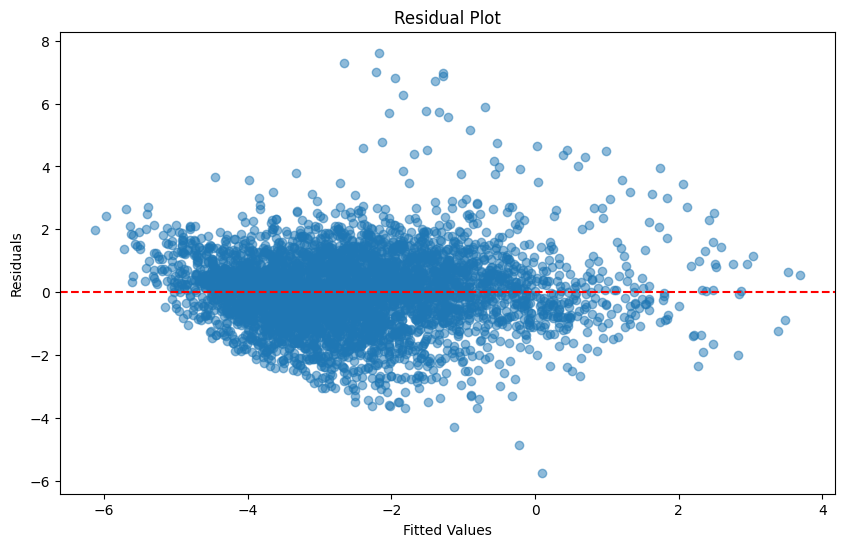

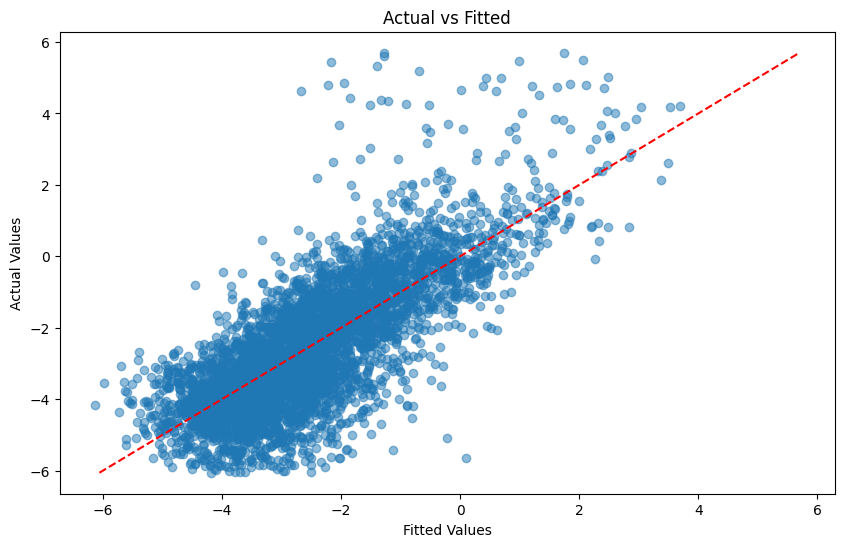

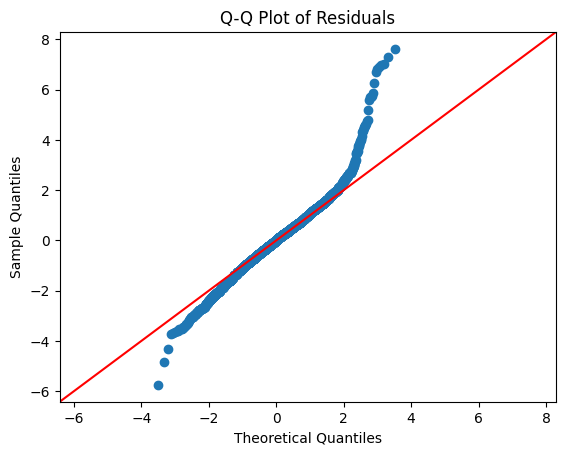

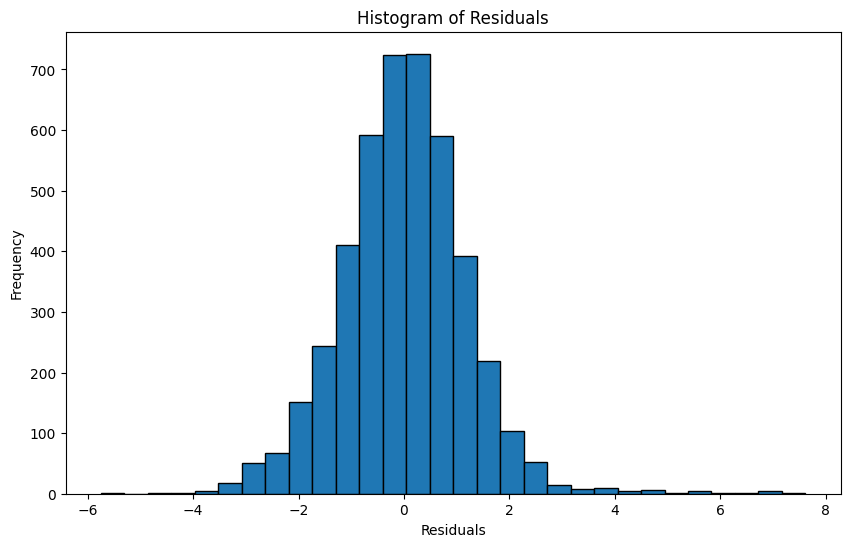

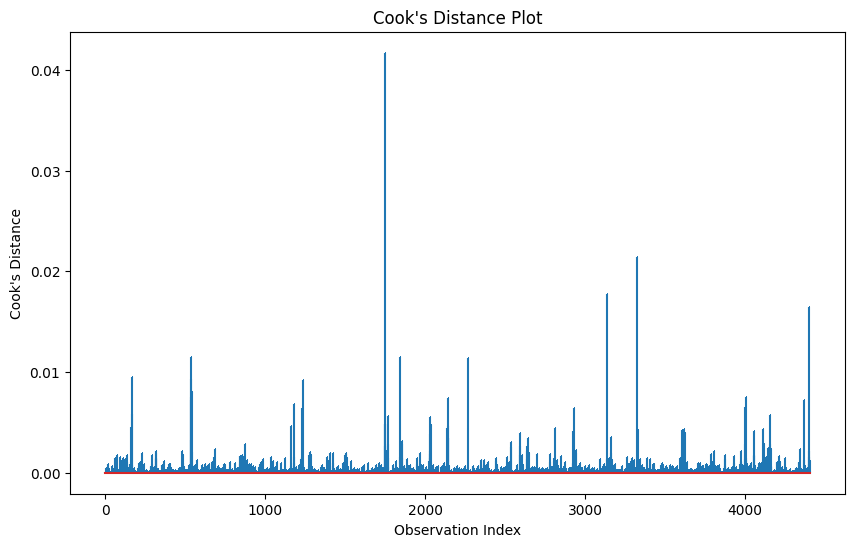

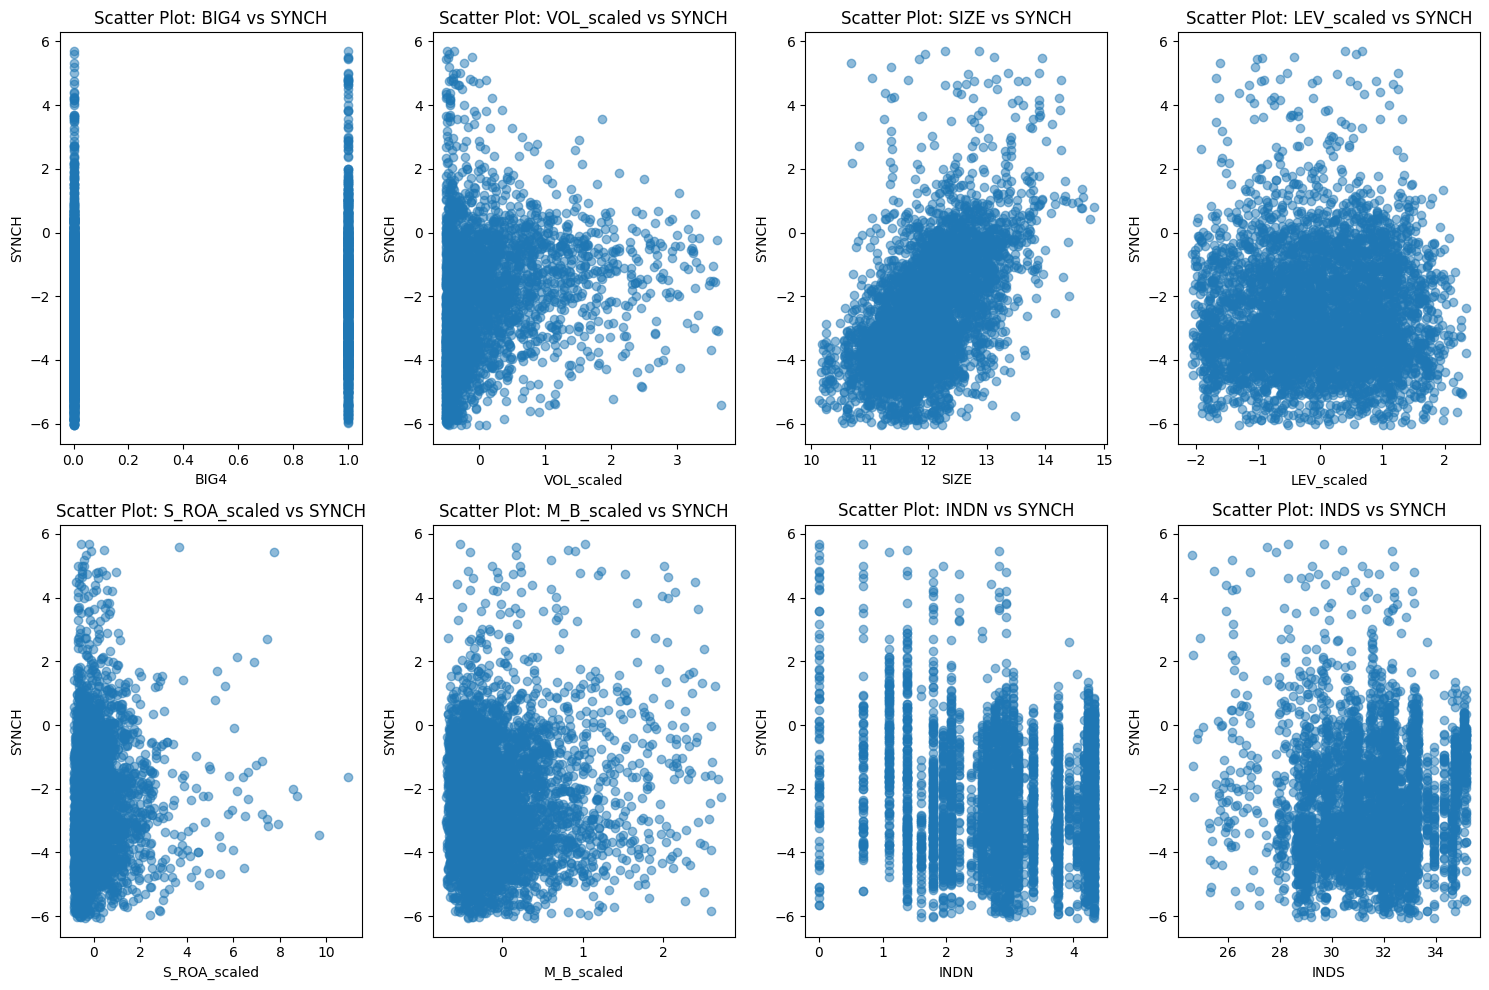

In [48]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Đọc dữ liệu từ file CSV
file_path = 'D:/data/file__data_section2.csv'  # Thay bằng đường dẫn thực tế
data = pd.read_csv(file_path)

# Chuẩn hóa các biến (VOL, M/B, INDN, INDS)
scaler = StandardScaler()
data[['VOL_scaled', 'M_B_scaled', 'INDN_scaled', 'INDS_scaled', 'SIZE_scaled', 'LEV_scaled', 
      'S_ROA_scaled', 'Lamda_scaled']] = scaler.fit_transform(data[['VOL', 'M/B', 'INDN', 'INDS', 'SIZE', 'LEV', 'S_ROA', 'Lamda']])

# Trimming thủ công cho biến VOL, M/B, và SYNCH
# Xác định ngưỡng phân vị 1% và 99% cho mỗi biến
trim_variables = ['VOL', 'M/B', 'SYNCH']
for var in trim_variables:
    lower_bound = data[var].quantile(0.01)
    upper_bound = data[var].quantile(0.99)
    data = data[(data[var] >= lower_bound) & (data[var] <= upper_bound)]

# Tạo một biến độ trễ của SYNCH
data['SYNCH_lag1'] = data['SYNCH'].shift(1)

# Loại bỏ các hàng có giá trị thiếu do tạo biến độ trễ
data = data.dropna(subset=['SYNCH_lag1'])

# Lấy các biến giả năm và ngành đã có trong dữ liệu
year_dummies = data.filter(like='Year_')  # Tất cả các cột bắt đầu bằng "Year_"
industry_dummies = data.filter(like='Industry_')  # Tất cả các cột bắt đầu bằng "Industry_"

# Loại bỏ một số biến giả để giảm đa cộng tuyến
year_dummies_reduced = year_dummies[['Year_2016', 'Year_2017', 'Year_2018', 'Year_2019', 'Year_2020', 
                                     'Year_2021', 'Year_2022']]  # Loại bỏ một số biến giả năm
industry_dummies_reduced = industry_dummies[['Industry_Congnghethongtin', 'Industry_Daukhi', 'Industry_Dichvutieudung', 
                                             'Industry_Duocphamvayte', 'Industry_Hangtieudung', 'Industry_Nguyenvatlieu', 
                                             'Industry_Taichinh']]  # Loại bỏ một số biến giả ngành

# Chọn các biến độc lập bao gồm biến đã chuẩn hóa, các biến giả đã giảm, và biến độ trễ của SYNCH
X = pd.concat([data[['BIG4', 'VOL_scaled', 'SIZE_scaled', 'LEV_scaled', 'S_ROA_scaled', 'M_B_scaled', 'INDN_scaled', 
                     'INDS_scaled', 'SYNCH_lag1', 'Lamda_scaled']], year_dummies_reduced, industry_dummies_reduced], axis=1)

# Biến phụ thuộc là SYNCH
y = data['SYNCH']

# Xử lý NaN và Inf
X = X.replace([np.inf, -np.inf], np.nan).dropna()  # Loại bỏ các hàng có giá trị NaN hoặc Inf
y = y.loc[X.index]  # Đồng bộ y với các hàng còn lại trong X

# Thêm hằng số (constant) vào mô hình
X = sm.add_constant(X)

# Thực hiện hồi quy OLS với clustering theo nhóm công ty (giả sử cột 'ma' là mã công ty)
model = sm.OLS(y, X).fit(cov_type='cluster', cov_kwds={'groups': data.loc[X.index, 'ma']})

# Hiển thị kết quả hồi quy
print(model.summary())

# Bước 1: Biểu đồ phần dư
residuals = model.resid
fitted_values = model.fittedvalues

plt.figure(figsize=(10, 6))
plt.scatter(fitted_values, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# Bước 2: Biểu đồ phân tán giữa giá trị thực tế và giá trị dự đoán
plt.figure(figsize=(10, 6))
plt.scatter(fitted_values, y, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='r', linestyle='--')
plt.title('Actual vs Fitted')
plt.xlabel('Fitted Values')
plt.ylabel('Actual Values')
plt.show()

# Bước 3: Biểu đồ Q-Q plot
sm.qqplot(residuals, line ='45')
plt.title('Q-Q Plot of Residuals')
plt.show()

# Bước 4: Biểu đồ histogram của phần dư
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Bước 5: Biểu đồ Cook's Distance
influence = model.get_influence()
(c, p) = influence.cooks_distance

plt.figure(figsize=(10, 6))
plt.stem(np.arange(len(c)), c, markerfmt=",")
plt.title("Cook's Distance Plot")
plt.xlabel('Observation Index')
plt.ylabel("Cook's Distance")
plt.show()

# Bước 6: Scatter Plot giữa các biến độc lập và biến phụ thuộc (SYNCH)
independent_vars = ['BIG4', 'VOL_scaled', 'SIZE', 'LEV_scaled', 'S_ROA_scaled', 'M_B_scaled', 'INDN', 'INDS']

plt.figure(figsize=(15, 10))
for i, var in enumerate(independent_vars, 1):
    plt.subplot(2, 4, i)
    plt.scatter(data[var], data['SYNCH'], alpha=0.5)
    plt.title(f'Scatter Plot: {var} vs SYNCH')
    plt.xlabel(var)
    plt.ylabel('SYNCH')

plt.tight_layout()
plt.show()

                            OLS Regression Results                            
Dep. Variable:                  SYNCH   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     90.72
Date:                Mon, 18 Nov 2024   Prob (F-statistic):          1.80e-178
Time:                        10:19:26   Log-Likelihood:                -7973.5
No. Observations:                4405   AIC:                         1.600e+04
Df Residuals:                    4381   BIC:                         1.615e+04
Df Model:                          23                                         
Covariance Type:              cluster                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

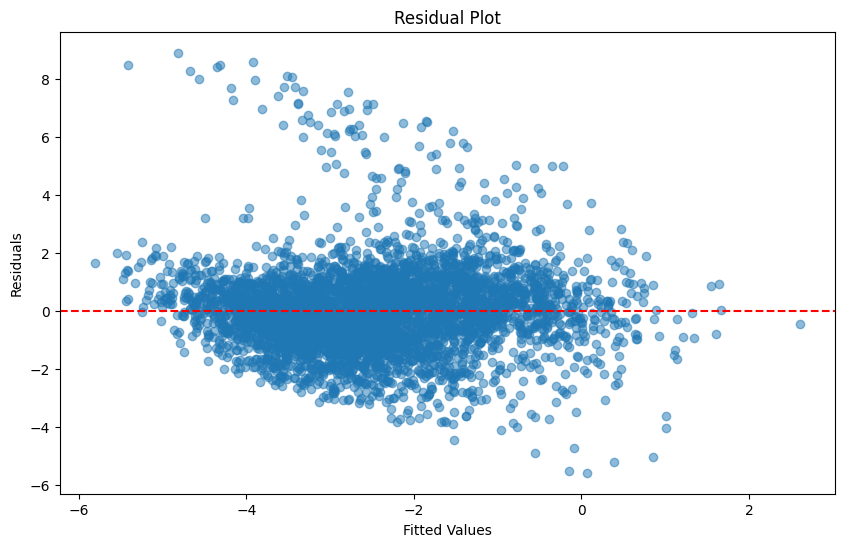

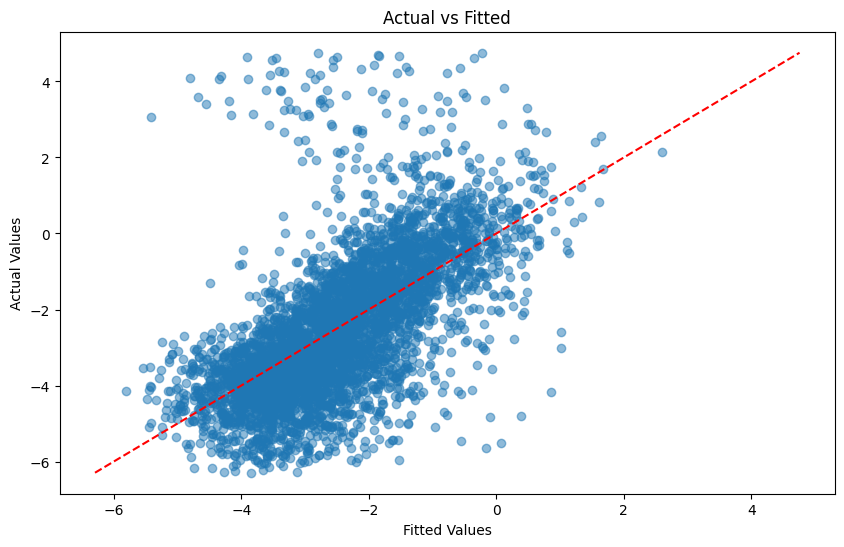

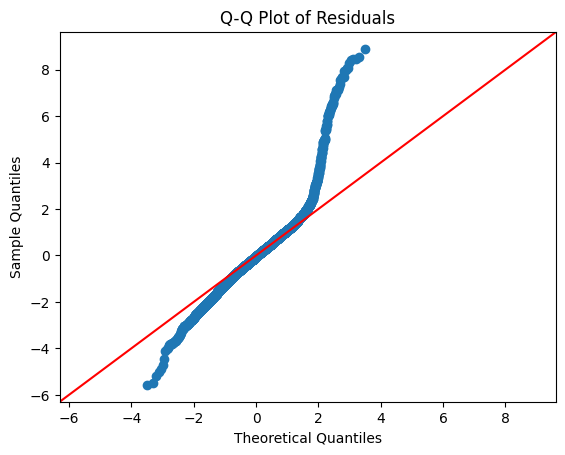

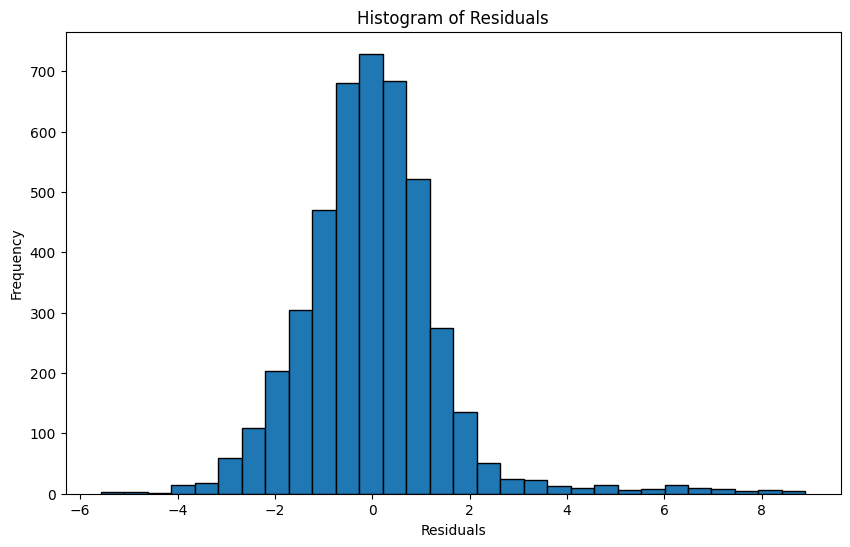

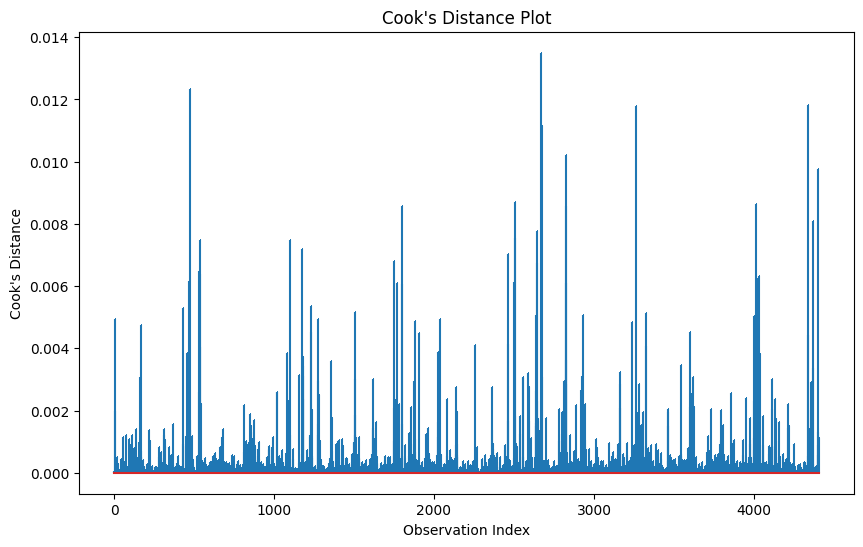

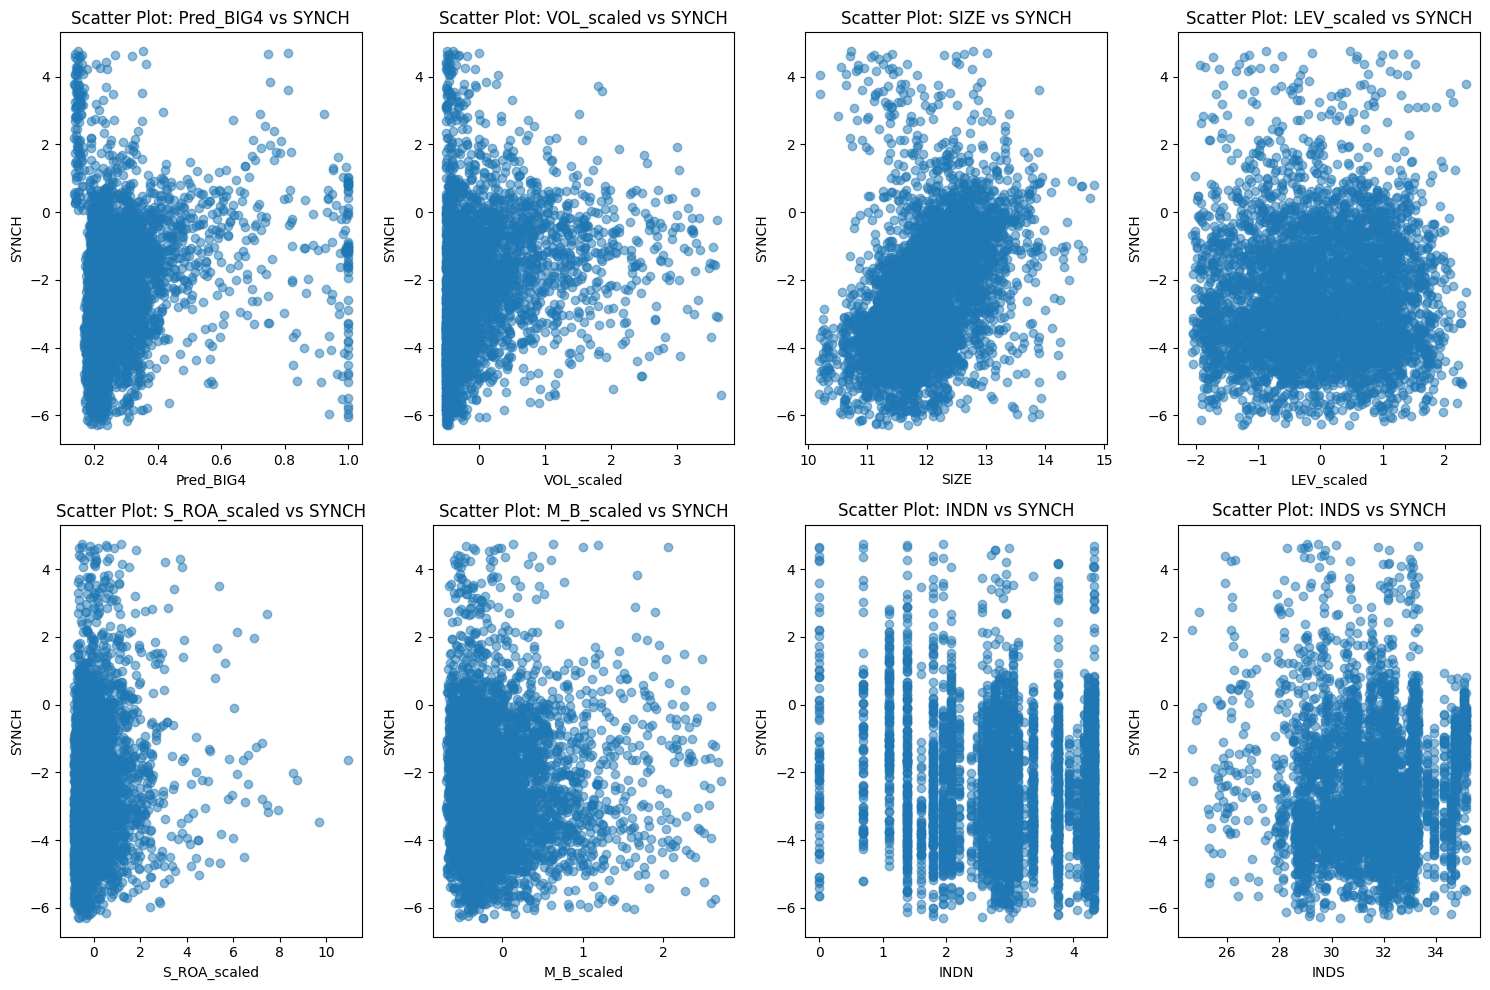

In [49]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Đọc dữ liệu từ file CSV
file_path = 'D:/data/file__data_section3.csv'  # Thay bằng đường dẫn thực tế
data = pd.read_csv(file_path)

# Chuẩn hóa các biến (VOL, M/B, INDN, INDS)
scaler = StandardScaler()
data[['VOL_scaled', 'M_B_scaled', 'INDN_scaled', 'INDS_scaled', 'SIZE_scaled', 'LEV_scaled', 
      'S_ROA_scaled', 'Pred_BIG4_scaled']] = scaler.fit_transform(data[['VOL', 'M/B', 'INDN', 'INDS', 'SIZE', 'LEV', 'S_ROA', 'Pred_BIG4']])

# Trimming thủ công cho biến VOL, M/B, và SYNCH
# Xác định ngưỡng phân vị 1% và 99% cho mỗi biến
trim_variables = ['VOL', 'M/B', 'SYNCH']
for var in trim_variables:
    lower_bound = data[var].quantile(0.01)
    upper_bound = data[var].quantile(0.99)
    data = data[(data[var] >= lower_bound) & (data[var] <= upper_bound)]

# Tạo một biến độ trễ của SYNCH
data['SYNCH_lag1'] = data['SYNCH'].shift(1)

# Loại bỏ các hàng có giá trị thiếu do tạo biến độ trễ
data = data.dropna(subset=['SYNCH_lag1'])

# Lấy các biến giả năm và ngành đã có trong dữ liệu
year_dummies = data.filter(like='Year_')  # Tất cả các cột bắt đầu bằng "Year_"
industry_dummies = data.filter(like='Industry_')  # Tất cả các cột bắt đầu bằng "Industry_"

# Loại bỏ một số biến giả để giảm đa cộng tuyến
year_dummies_reduced = year_dummies[['Year_2016', 'Year_2017', 'Year_2018', 'Year_2019', 'Year_2020', 
                                     'Year_2021', 'Year_2022']]  # Loại bỏ một số biến giả năm
industry_dummies_reduced = industry_dummies[['Industry_Congnghethongtin', 'Industry_Daukhi', 'Industry_Dichvutieudung', 
                                             'Industry_Duocphamvayte', 'Industry_Hangtieudung', 'Industry_Nguyenvatlieu', 
                                             'Industry_Taichinh']]  # Loại bỏ một số biến giả ngành

# Chọn các biến độc lập bao gồm biến đã chuẩn hóa, các biến giả đã giảm, và biến độ trễ của SYNCH
X = pd.concat([data[['Pred_BIG4_scaled', 'VOL_scaled', 'SIZE_scaled', 'LEV_scaled', 'S_ROA_scaled', 'M_B_scaled', 'INDN_scaled', 
                     'INDS_scaled', 'SYNCH_lag1']], year_dummies_reduced, industry_dummies_reduced], axis=1)

# Biến phụ thuộc là SYNCH
y = data['SYNCH']

# Xử lý NaN và Inf
X = X.replace([np.inf, -np.inf], np.nan).dropna()  # Loại bỏ các hàng có giá trị NaN hoặc Inf
y = y.loc[X.index]  # Đồng bộ y với các hàng còn lại trong X

# Thêm hằng số (constant) vào mô hình
X = sm.add_constant(X)

# Thực hiện hồi quy OLS với clustering theo nhóm công ty (giả sử cột 'ma' là mã công ty)
model = sm.OLS(y, X).fit(cov_type='cluster', cov_kwds={'groups': data.loc[X.index, 'ma']})

# Hiển thị kết quả hồi quy
print(model.summary())

# Bước 1: Biểu đồ phần dư
residuals = model.resid
fitted_values = model.fittedvalues

plt.figure(figsize=(10, 6))
plt.scatter(fitted_values, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# Bước 2: Biểu đồ phân tán giữa giá trị thực tế và giá trị dự đoán
plt.figure(figsize=(10, 6))
plt.scatter(fitted_values, y, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='r', linestyle='--')
plt.title('Actual vs Fitted')
plt.xlabel('Fitted Values')
plt.ylabel('Actual Values')
plt.show()

# Bước 3: Biểu đồ Q-Q plot
sm.qqplot(residuals, line ='45')
plt.title('Q-Q Plot of Residuals')
plt.show()

# Bước 4: Biểu đồ histogram của phần dư
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Bước 5: Biểu đồ Cook's Distance
influence = model.get_influence()
(c, p) = influence.cooks_distance

plt.figure(figsize=(10, 6))
plt.stem(np.arange(len(c)), c, markerfmt=",")
plt.title("Cook's Distance Plot")
plt.xlabel('Observation Index')
plt.ylabel("Cook's Distance")
plt.show()

# Bước 6: Scatter Plot giữa các biến độc lập và biến phụ thuộc (SYNCH)
independent_vars = ['Pred_BIG4', 'VOL_scaled', 'SIZE', 'LEV_scaled', 'S_ROA_scaled', 'M_B_scaled', 'INDN', 'INDS']

plt.figure(figsize=(15, 10))
for i, var in enumerate(independent_vars, 1):
    plt.subplot(2, 4, i)
    plt.scatter(data[var], data['SYNCH'], alpha=0.5)
    plt.title(f'Scatter Plot: {var} vs SYNCH')
    plt.xlabel(var)
    plt.ylabel('SYNCH')

plt.tight_layout()
plt.show()

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Tính VIF cho các biến độc lập (trừ cột hằng số)
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Hiển thị kết quả VIF
print(vif_data)

                     Variable        VIF
0                       const  22.943152
1                        BIG4   1.240487
2                  VOL_scaled   1.267169
3                 SIZE_scaled   2.970933
4                  LEV_scaled   1.320411
5                S_ROA_scaled   1.149970
6                  M_B_scaled   1.222884
7                 INDN_scaled   5.265929
8                 INDS_scaled   6.498799
9                  SYNCH_lag1   1.522886
10               Lamda_scaled   2.677527
11                  Year_2016   1.663302
12                  Year_2017   1.659274
13                  Year_2018   1.669982
14                  Year_2019   1.668241
15                  Year_2020   1.692239
16                  Year_2021   1.655007
17                  Year_2022   1.642100
18  Industry_Congnghethongtin   1.407024
19            Industry_Daukhi   1.369369
20    Industry_Dichvutieudung   2.456685
21     Industry_Duocphamvayte   1.529611
22      Industry_Hangtieudung   2.478521
23     Industry_

In [19]:
import pandas as pd

# Đọc dữ liệu từ file Excel hoặc CSV
file_path = 'D:/data/MAR_data.xlsx'  # Đổi đường dẫn này đến file của bạn
data = pd.read_excel(file_path)

# Chuyển đổi cột ngày về định dạng datetime
data['ngay'] = pd.to_datetime(data['ngay'])

# Thêm cột 'month' và 'year' để lấy giá đóng cửa cuối tháng
data['month'] = data['ngay'].dt.month
data['year'] = data['ngay'].dt.year

# Sắp xếp dữ liệu để đảm bảo tính toán đúng thứ tự
data = data.sort_values(by=['ma', 'ngay'])

# Lấy giá đóng cửa của ngày cuối cùng trong mỗi tháng cho từng công ty
monthly_data = data.groupby(['ma', 'year', 'month']).last().reset_index()

# Tính lợi suất hàng tháng từ giá đóng cửa cuối tháng cho cả công ty và chỉ số thị trường
monthly_data['actual_return_company'] = monthly_data.groupby('ma')['giadongcuadc'].pct_change()
monthly_data['market_return'] = monthly_data['index'].pct_change()

# Tính Market-Adjusted Return là chênh lệch giữa actual_return_company và market_return
monthly_data['market_adjusted_return'] = monthly_data['actual_return_company'] - monthly_data['market_return']

# Tính MAR bằng cách tích lũy liên tục lợi suất điều chỉnh theo thị trường qua 12 tháng
# Lọc dữ liệu 12 tháng cho mỗi năm kết thúc vào tháng 4 của năm sau
def calculate_mar(group):
    # Chọn ra 12 tháng từ tháng 5 của năm hiện tại đến tháng 4 của năm sau
    target_period = group[((group['month'] >= 5) & (group['year'] == group['year'].iloc[0])) |
                          ((group['month'] <= 4) & (group['year'] == group['year'].iloc[0] + 1))]
    # Compounded MAR qua 12 tháng
    mar = (1 + target_period['market_adjusted_return']).prod() - 1
    return pd.Series({'MAR': mar})

# Áp dụng hàm cho từng công ty và năm
mar_results = monthly_data.groupby(['ma', 'year']).apply(calculate_mar).reset_index()

# Lưu kết quả vào file CSV
output_path = 'D:/data/MAR_results.csv'  # Đổi tên file xuất ra nếu muốn
mar_results.to_csv(output_path, index=False)

print(f"Kết quả MAR đã được lưu vào file: {output_path}")


Kết quả MAR đã được lưu vào file: D:/data/MAR_results.csv


C:\Users\minhthao372003\AppData\Local\Temp\ipykernel_4084\3890353604.py:38: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  mar_results = monthly_data.groupby(['ma', 'year']).apply(calculate_mar).reset_index()


In [39]:
import pandas as pd

# Đọc dữ liệu từ file
file_path = 'D:/data/HNX_clean.xlsx'  # Đổi đường dẫn này đến file của bạn
data = pd.read_excel(file_path)

# Kiểm tra và in tên các cột
print("Tên các cột ban đầu:", data.columns.tolist())

# Loại bỏ khoảng trắng ở đầu và cuối của tên cột
data.columns = data.columns.str.strip()
print("Tên các cột sau khi loại bỏ khoảng trắng:", data.columns.tolist())

# Đổi tên cột nếu cần, ví dụ: nếu phát hiện cột có tên khác, bạn có thể đổi thành "ngay"
# data.rename(columns={'tên_cột_gốc': 'ngay'}, inplace=True)

# Chuyển đổi cột 'ngay' về định dạng datetime, bỏ qua các giá trị không hợp lệ
data['ngay'] = pd.to_datetime(data['ngay'], errors='coerce')

# Thêm cột 'month' và 'year' từ cột 'ngay'
data['month'] = data['ngay'].dt.month
data['year'] = data['ngay'].dt.year

# Sắp xếp dữ liệu để đảm bảo tính toán đúng thứ tự
data = data.sort_values(by=['ma', 'ngay'])

# Lấy giá trị đóng cửa cuối tháng
monthly_data = data.groupby(['ma', 'year', 'month']).last().reset_index()

# Tính lợi suất hàng tháng từ giá đóng cửa cuối tháng cho cả công ty và chỉ số thị trường
monthly_data['actual_return_company'] = monthly_data.groupby('ma')['giadongcuadc'].pct_change()
monthly_data['market_return'] = monthly_data['index'].pct_change()

# Tính Market-Adjusted Return
monthly_data['market_adjusted_return'] = monthly_data['actual_return_company'] - monthly_data['market_return']

# Tính MAR qua 12 tháng
def calculate_mar(group):
    target_period = group[((group['month'] >= 5) & (group['year'] == group['year'].iloc[0])) |
                          ((group['month'] <= 4) & (group['year'] == group['year'].iloc[0] + 1))]
    mar = (1 + target_period['market_adjusted_return']).prod() - 1
    return pd.Series({'MAR': mar})

# Áp dụng hàm cho từng công ty và năm
mar_results = monthly_data.groupby(['ma', 'year']).apply(calculate_mar).reset_index()

# Lưu kết quả vào file CSV
output_path = 'D:/data/MAR_HNX_results.csv'  # Đổi tên file xuất ra nếu muốn
mar_results.to_csv(output_path, index=False)

print(f"Kết quả MAR đã được lưu vào file: {output_path}")


Tên các cột ban đầu: ['stt', 'ma', 'tennganh', 'ngay', 'giadongcua', 'giadongcuadc', 'khoiluong', 'san', 'nganh', 'chisonganh', 'index']
Tên các cột sau khi loại bỏ khoảng trắng: ['stt', 'ma', 'tennganh', 'ngay', 'giadongcua', 'giadongcuadc', 'khoiluong', 'san', 'nganh', 'chisonganh', 'index']
Kết quả MAR đã được lưu vào file: D:/data/MAR_HNX_results.csv


C:\Users\minhthao372003\AppData\Local\Temp\ipykernel_4084\1942500923.py:45: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  mar_results = monthly_data.groupby(['ma', 'year']).apply(calculate_mar).reset_index()


In [40]:
import pandas as pd

# Đọc dữ liệu từ file
file_path = 'D:/data/HOSE_clean.xlsx'  # Đổi đường dẫn này đến file của bạn
data = pd.read_excel(file_path)

# Kiểm tra và in tên các cột
print("Tên các cột ban đầu:", data.columns.tolist())

# Loại bỏ khoảng trắng ở đầu và cuối của tên cột
data.columns = data.columns.str.strip()
print("Tên các cột sau khi loại bỏ khoảng trắng:", data.columns.tolist())

# Đổi tên cột nếu cần, ví dụ: nếu phát hiện cột có tên khác, bạn có thể đổi thành "ngay"
# data.rename(columns={'tên_cột_gốc': 'ngay'}, inplace=True)

# Chuyển đổi cột 'ngay' về định dạng datetime, bỏ qua các giá trị không hợp lệ
data['ngay'] = pd.to_datetime(data['ngay'], errors='coerce')

# Thêm cột 'month' và 'year' từ cột 'ngay'
data['month'] = data['ngay'].dt.month
data['year'] = data['ngay'].dt.year

# Sắp xếp dữ liệu để đảm bảo tính toán đúng thứ tự
data = data.sort_values(by=['ma', 'ngay'])

# Lấy giá trị đóng cửa cuối tháng
monthly_data = data.groupby(['ma', 'year', 'month']).last().reset_index()

# Tính lợi suất hàng tháng từ giá đóng cửa cuối tháng cho cả công ty và chỉ số thị trường
monthly_data['actual_return_company'] = monthly_data.groupby('ma')['giadongcuadc'].pct_change()
monthly_data['market_return'] = monthly_data['index'].pct_change()

# Tính Market-Adjusted Return
monthly_data['market_adjusted_return'] = monthly_data['actual_return_company'] - monthly_data['market_return']

# Tính MAR qua 12 tháng
def calculate_mar(group):
    target_period = group[((group['month'] >= 5) & (group['year'] == group['year'].iloc[0])) |
                          ((group['month'] <= 4) & (group['year'] == group['year'].iloc[0] + 1))]
    mar = (1 + target_period['market_adjusted_return']).prod() - 1
    return pd.Series({'MAR': mar})

# Áp dụng hàm cho từng công ty và năm
mar_results = monthly_data.groupby(['ma', 'year']).apply(calculate_mar).reset_index()

# Lưu kết quả vào file CSV
output_path = 'D:/data/MAR_HOSE_results.csv'  # Đổi tên file xuất ra nếu muốn
mar_results.to_csv(output_path, index=False)

print(f"Kết quả MAR đã được lưu vào file: {output_path}")

Tên các cột ban đầu: ['stt', 'ma', 'tennganh', 'ngay', 'giadongcua', 'giadongcuadc', 'khoiluong', 'san', 'nganh', 'chisonganh', 'index']
Tên các cột sau khi loại bỏ khoảng trắng: ['stt', 'ma', 'tennganh', 'ngay', 'giadongcua', 'giadongcuadc', 'khoiluong', 'san', 'nganh', 'chisonganh', 'index']
Kết quả MAR đã được lưu vào file: D:/data/MAR_HOSE_results.csv


C:\Users\minhthao372003\AppData\Local\Temp\ipykernel_4084\21819166.py:45: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  mar_results = monthly_data.groupby(['ma', 'year']).apply(calculate_mar).reset_index()


In [1]:
import pandas as pd

# Đường dẫn đến file Excel của bạn
file_path = 'D:/data/marcap1.xlsx'  # Thay đường dẫn này thành đường dẫn file của bạn
output_file_path = 'D:/data/marketcap_2015.csv'  # Đường dẫn nơi bạn muốn lưu file CSV

# Đọc dữ liệu từ file Excel
data = pd.read_excel(file_path)

# Lọc những dòng có năm là 2015 trong cột 'year'
filtered_data = data[data['year'] == 2015]

# Lưu dữ liệu đã lọc vào file CSV
filtered_data.to_csv(output_file_path, index=False)

print(f"Dữ liệu lọc năm 2015 đã được lưu vào: {output_file_path}")


Dữ liệu lọc năm 2015 đã được lưu vào: D:/data/marketcap_2015.csv


In [36]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

# Đọc dữ liệu từ file CSV
data = pd.read_csv('D:/data/file__data_earning_info.csv')

# Loại bỏ một biến giả của mỗi nhóm để tránh đa cộng tuyến
data = data.drop(columns=['Year_2016', 'Industry_Congnghethongtin'])

# Tạo các biến tương tác dựa trên biến MCAP đã chuẩn hóa
data['NI_DR_SYNCH'] = data['NI'] * data['DR_SYNCH']
data['NI_MCAP'] = data['NI'] * data['MCAP']
data['NI_LEV'] = data['NI'] * data['LEV']
data['NI_MB'] = data['NI'] * data['M/B']

# Xác định các biến độc lập và phụ thuộc theo yêu cầu
X = data[['NI', 'NI_DR_SYNCH', 'NI_MCAP', 'NI_LEV', 'NI_MB'] + 
         [col for col in data.columns if col.startswith('Year_') or col.startswith('Industry_')]]
y = data['MAR']

# Thêm hệ số hằng vào mô hình
X = sm.add_constant(X)

# Đảm bảo tất cả các cột đều là số để tránh lỗi kiểu dữ liệu
X = X.apply(pd.to_numeric, errors='coerce')
X = X.dropna()
y = y.loc[X.index]  # Đồng bộ y với dữ liệu X đã xử lý

# Thực hiện hồi quy với clustering theo nhóm công ty
model = sm.OLS(y, X).fit(cov_type='cluster', cov_kwds={'groups': data.loc[X.index, 'ma']})

# In kết quả hồi quy
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    MAR   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     89.71
Date:                Sun, 17 Nov 2024   Prob (F-statistic):          2.84e-170
Time:                        23:14:00   Log-Likelihood:                -2901.5
No. Observations:                4756   AIC:                             5845.
Df Residuals:                    4735   BIC:                             5981.
Df Model:                          20                                         
Covariance Type:              cluster                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Tính VIF cho các biến độc lập (trừ cột hằng số)
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Hiển thị kết quả VIF
print(vif_data)

                    Variable         VIF
0                      const   44.718591
1                         NI  291.913972
2                NI_DR_SYNCH    5.440134
3                    NI_MCAP  325.830301
4                     NI_LEV    4.907613
5                      NI_MB    3.442047
6                  Year_2017    1.901745
7                  Year_2018    1.933973
8                  Year_2019    1.972627
9                  Year_2020    2.000053
10                 Year_2021    2.025523
11                 Year_2022    2.027520
12                 Year_2023    2.031829
13           Industry_Daukhi    1.281305
14   Industry_Dichvutieudung    3.577740
15    Industry_Duocphamvayte    2.200100
16     Industry_Hangtieudung    5.305156
17    Industry_Nguyenvatlieu    9.415048
18         Industry_Taichinh    4.610507
19  Industry_Tienichcongdong    3.780345
20        Industry_Vienthong    1.053662


In [38]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

# Đọc dữ liệu từ file CSV
data = pd.read_csv('D:/data/file__data_earning_info.csv')

# Loại bỏ một biến giả của mỗi nhóm để tránh đa cộng tuyến
data = data.drop(columns=['Year_2016', 'Industry_Congnghethongtin'])

# Thực hiện trimming 1% hai đầu biến M/B
lower_bound = data['M/B'].quantile(0.01)
upper_bound = data['M/B'].quantile(0.99)
data = data[(data['M/B'] >= lower_bound) & (data['M/B'] <= upper_bound)]

# Tạo các biến tương tác dựa trên biến MCAP đã chuẩn hóa
data['NI_DR_SYNCH'] = data['NI'] * data['DR_SYNCH']
data['NI_MCAP'] = data['NI'] * data['MCAP']
data['NI_LEV'] = data['NI'] * data['LEV']
data['NI_MB'] = data['NI'] * data['M/B']

# Xác định các biến độc lập và phụ thuộc theo yêu cầu
X = data[['NI', 'NI_DR_SYNCH', 'NI_MCAP', 'NI_LEV', 'NI_MB'] + 
         [col for col in data.columns if col.startswith('Year_') or col.startswith('Industry_')]]
y = data['MAR']

# Thêm hệ số hằng vào mô hình
X = sm.add_constant(X)

# Đảm bảo tất cả các cột đều là số để tránh lỗi kiểu dữ liệu
X = X.apply(pd.to_numeric, errors='coerce')
X = X.dropna()
y = y.loc[X.index]  # Đồng bộ y với dữ liệu X đã xử lý

# Thực hiện hồi quy với clustering theo nhóm công ty
model = sm.OLS(y, X).fit(cov_type='cluster', cov_kwds={'groups': data.loc[X.index, 'ma']})

# In kết quả hồi quy
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    MAR   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     90.84
Date:                Sun, 17 Nov 2024   Prob (F-statistic):          1.52e-171
Time:                        23:14:27   Log-Likelihood:                -2801.4
No. Observations:                4664   AIC:                             5645.
Df Residuals:                    4643   BIC:                             5780.
Df Model:                          20                                         
Covariance Type:              cluster                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [41]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

# Đọc dữ liệu từ file CSV
data = pd.read_csv('D:/data/file__data_earning_info.csv')

# Loại bỏ một biến giả của mỗi nhóm để tránh đa cộng tuyến
data = data.drop(columns=['Year_2016', 'Industry_Congnghethongtin'])

# Thực hiện trimming 1% hai đầu biến M/B
lower_bound = data['M/B'].quantile(0.01)
upper_bound = data['M/B'].quantile(0.99)
data = data[(data['M/B'] >= lower_bound) & (data['M/B'] <= upper_bound)]

# Chuẩn hóa các biến sử dụng StandardScaler
scaler = StandardScaler()
data[['NI', 'MCAP', 'LEV', 'M/B', 'DR_SYNCH']] = scaler.fit_transform(data[['NI', 'MCAP', 'LEV', 'M/B', 'DR_SYNCH']])

# Tạo các biến tương tác dựa trên biến MCAP đã chuẩn hóa
data['NI_DR_SYNCH'] = data['NI'] * data['DR_SYNCH']
data['NI_MCAP'] = data['NI'] * data['MCAP']
data['NI_LEV'] = data['NI'] * data['LEV']
data['NI_MB'] = data['NI'] * data['M/B']

# Xác định các biến độc lập và phụ thuộc theo yêu cầu
X = data[['NI', 'NI_DR_SYNCH', 'NI_MCAP', 'NI_LEV', 'NI_MB'] + 
         [col for col in data.columns if col.startswith('Year_') or col.startswith('Industry_')]]
y = data['MAR']

# Thêm hệ số hằng vào mô hình
X = sm.add_constant(X)

# Đảm bảo tất cả các cột đều là số để tránh lỗi kiểu dữ liệu
X = X.apply(pd.to_numeric, errors='coerce')
X = X.dropna()
y = y.loc[X.index]  # Đồng bộ y với dữ liệu X đã xử lý

# Thực hiện hồi quy với clustering theo nhóm công ty
model = sm.OLS(y, X).fit(cov_type='cluster', cov_kwds={'groups': data.loc[X.index, 'ma']})

# In kết quả hồi quy
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    MAR   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     86.88
Date:                Sun, 17 Nov 2024   Prob (F-statistic):          4.77e-167
Time:                        23:16:47   Log-Likelihood:                -2827.7
No. Observations:                4664   AIC:                             5697.
Df Residuals:                    4643   BIC:                             5833.
Df Model:                          20                                         
Covariance Type:              cluster                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [46]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

# Đọc dữ liệu từ file CSV
data = pd.read_csv('D:/data/file__data_earning_info.csv')

# Loại bỏ một biến giả của mỗi nhóm để tránh đa cộng tuyến
data = data.drop(columns=['Year_2016', 'Industry_Congnghethongtin'])

# Thực hiện trimming 1% hai đầu biến M/B
lower_bound = data['M/B'].quantile(0.01)
upper_bound = data['M/B'].quantile(0.99)
data = data[(data['M/B'] >= lower_bound) & (data['M/B'] <= upper_bound)]

# Chuẩn hóa các biến sử dụng StandardScaler
scaler = StandardScaler()
data[['MCAP', 'NI']] = scaler.fit_transform(data[[ 'MCAP', 'NI']])

# Tạo các biến tương tác dựa trên biến MCAP đã chuẩn hóa
data['NI_DR_SYNCH'] = data['NI'] * data['DR_SYNCH']
data['NI_MCAP'] = data['NI'] * data['MCAP']
data['NI_LEV'] = data['NI'] * data['LEV']
data['NI_MB'] = data['NI'] * data['M/B']

# Xác định các biến độc lập và phụ thuộc theo yêu cầu
X = data[['NI', 'NI_DR_SYNCH', 'NI_MCAP', 'NI_LEV', 'NI_MB'] + 
         [col for col in data.columns if col.startswith('Year_') or col.startswith('Industry_')]]
y = data['MAR']

# Thêm hệ số hằng vào mô hình
X = sm.add_constant(X)

# Đảm bảo tất cả các cột đều là số để tránh lỗi kiểu dữ liệu
X = X.apply(pd.to_numeric, errors='coerce')
X = X.dropna()
y = y.loc[X.index]  # Đồng bộ y với dữ liệu X đã xử lý

# Thực hiện hồi quy với clustering theo nhóm công ty
model = sm.OLS(y, X).fit(cov_type='cluster', cov_kwds={'groups': data.loc[X.index, 'ma']})

# In kết quả hồi quy
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    MAR   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     86.88
Date:                Sun, 17 Nov 2024   Prob (F-statistic):          4.77e-167
Time:                        23:21:02   Log-Likelihood:                -2827.7
No. Observations:                4664   AIC:                             5697.
Df Residuals:                    4643   BIC:                             5833.
Df Model:                          20                                         
Covariance Type:              cluster                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Tính VIF cho các biến độc lập (trừ cột hằng số)
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Hiển thị kết quả VIF
print(vif_data)

                    Variable        VIF
0                      const  44.718591
1                         NI  19.673946
2                NI_DR_SYNCH   5.440134
3                    NI_MCAP   3.991033
4                     NI_LEV   4.907613
5                      NI_MB   3.442047
6                  Year_2017   1.901745
7                  Year_2018   1.933973
8                  Year_2019   1.972627
9                  Year_2020   2.000053
10                 Year_2021   2.025523
11                 Year_2022   2.027520
12                 Year_2023   2.031829
13           Industry_Daukhi   1.281305
14   Industry_Dichvutieudung   3.577740
15    Industry_Duocphamvayte   2.200100
16     Industry_Hangtieudung   5.305156
17    Industry_Nguyenvatlieu   9.415048
18         Industry_Taichinh   4.610507
19  Industry_Tienichcongdong   3.780345
20        Industry_Vienthong   1.053662
